<a href="https://colab.research.google.com/github/PRIYANKA-VIS/-priya---wankhede/blob/main/mini_project_image_class_Untitled16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
type(train_ds)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
import matplotlib.pyplot as plt

# Define a function to display images with labels
def show_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(f"Label: {labels[i].numpy()}")
            plt.axis("off")

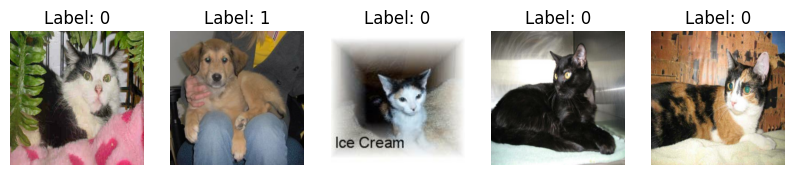

In [ ]:
# Display the first 5 images with labels
show_images(train_ds, num_images=5)
plt.show()

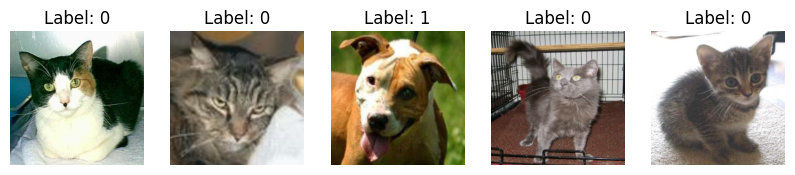

In [ ]:
# Display the first 5 images with labels
show_images(validation_ds, num_images=5)
plt.show()

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 57s 80ms/step - loss: 0.6127 - accuracy: 0.6549 - val_loss: 0.5051 - val_accuracy: 0.7612
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4775 - accuracy: 0.7703 - val_loss: 0.4743 - val_accuracy: 0.7854
Epoch 3/10
625/625 [==============================] - 49s 78ms/step - loss: 0.3601 - accuracy: 0.8407 - val_loss: 0.5573 - val_accuracy: 0.7798
Epoch 4/10
625/625 [==============================] - 50s 80ms/step - loss: 0.2266 - accuracy: 0.9068 - val_loss: 0.6705 - val_accuracy: 0.7952
Epoch 5/10
625/625 [==============================] - 49s 78ms/step - loss: 0.1177 - accuracy: 0.9564 - val_loss: 0.9653 - val_accuracy: 0.7852
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0802 - accuracy: 0.9721 - val_loss: 1.0313 - val_accuracy: 0.7902
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 1.2088 - val_accuracy: